In [66]:
# 모듈 로딩
import tensorflow as tf
from keras import Sequential              # 모델 객체 
from keras.layers import Dense            # 레이어 객체
from keras.layers import Dropout            # 레이어 객체

import numpy as np
from keras.datasets.boston_housing import load_data

### [1] 데이터 로딩

In [3]:
# 학습용 : 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [5]:
x_train[0], y_train[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 15.2)

### [1-1] 전처리
---
 - 특성(Feature) 전처리
   - 수치 데이터: 값의 범위
   - 문자 데이터: 수치화

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [62]:
scaler=StandardScaler()


In [65]:
scaler.fit(x_train)

StandardScaler()

In [57]:
scaler.mean_, scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [59]:
x_train_scaled=scaler.transform(x_train)

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

### [2] NN Model 실습
---
 - (1) 모델 구상
 - (2) 모델 생성
 - (3) 학습
 - (4) 평가
 - (5) 테스트

#### [2-1] 모델 구상
 - 입력 데이터 -> 13개 Features
 - 출력 데이터 -> 1개 집값  
 - 학슥 방법: 회귀  

-> Dense Layer: node=1 af=linear, inpu_shape=(13,)
 

In [78]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential()

In [79]:
# Layer 추가하기
# model.add(input(shape=(13,),name='input')) # 첫 Dense 파라미터로 안넣고 직접 입력
model.add(Dense(30, activation='relu', input_shape=(13,), name='hidden-1')) # 노드수, 활성함수, 입력특성수

# 과적합 해결하기 위해서 지정된 비율만큼 노드를 비활성화
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', name='hidden-2'))

# 회귀 출력층
model.add(Dense(1, activation='linear', name='output'))

In [80]:
# 모델 구성 확인 -> summary()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 30)                420       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 hidden-2 (Dense)            (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
---
 - Sequential 클래스의 compile 메서드
 - 모델이 동장하기 위해서 필요한 설정
   - 오차 계산 함수 설정 -> loss
     - 회귀: mae, mse, rmse
     - 분류: crossentropy
       - 이진분류: binary_crossentropy
       - 다중분류: categorical_crossentropy(타겟 원핫인코딩o)  
       sparse_categorical_crossentropy(타겟 원핫인코딩X)
   - W, B 최적화 방식 설정 -> optimizer
     - 기본: rmsprop
     - adam, momonent, ... 최적화 클래스 이름 문자열 입력
   - 모델의 성능 측정 항목 설정 -> metrics
     - 기본: loss
     - 클래스 이름 문자열 입력
 - 파라미터 값들
   - str 타입으로 입력 가능
   - 객체 다입으로 입력 가능 

In [38]:
model.compile(loss='mse', optimizer='adam', metrics='mse')

### [2-3] 학습
---
 - fit() 메서드
   - 파라미터
     - epochs: 처음~끝 학습횟수
     - batch_size: 학습량 크기
     - validation_split: 학습 데이터의 일부를 검증용으로 분리 0.0~1.0
     - validation_data: (테스트데이터, 테스트타겟)
     - callbacks: 학습 시 발생하는 이벤트 처리 함수 등록
   - 반환값 -> History객체
     - 형태: dict 형태
     - 기본: 학습 데이터에 대한 loss값 저장
     


In [39]:
# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
from keras.callbacks import EarlyStopping

stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [40]:
result=model.fit(x_train, y_train,
                 epochs=1000,
                 batch_size=10,
                 validation_data=(x_test, y_test),
                 callbacks=[stopCB])

Epoch 1/1000
41/41 [==============================] - 1s 8ms/step - loss: 3504.1404 - mse: 3504.1404 - val_loss: 202.8909 - val_mse: 202.8909
Epoch 2/1000
41/41 [==============================] - 0s 6ms/step - loss: 224.8833 - mse: 224.8833 - val_loss: 118.6282 - val_mse: 118.6282
Epoch 3/1000
41/41 [==============================] - 0s 4ms/step - loss: 126.3962 - mse: 126.3962 - val_loss: 97.7521 - val_mse: 97.7521
Epoch 4/1000
41/41 [==============================] - 0s 5ms/step - loss: 104.7888 - mse: 104.7888 - val_loss: 88.7350 - val_mse: 88.7350
Epoch 5/1000
41/41 [==============================] - 0s 5ms/step - loss: 94.4036 - mse: 94.4036 - val_loss: 81.8201 - val_mse: 81.8201
Epoch 6/1000
41/41 [==============================] - 0s 5ms/step - loss: 87.3065 - mse: 87.3065 - val_loss: 76.6876 - val_mse: 76.6876
Epoch 7/1000
41/41 [==============================] - 0s 4ms/step - loss: 82.2180 - mse: 82.2180 - val_loss: 78.5803 - val_mse: 78.5803
Epoch 8/1000
41/41 [==============

In [41]:
# 학습 후 학습 결과 체크 -> History 객체
type(result), result.history

(keras.callbacks.History,
 {'loss': [3504.140380859375,
   224.88333129882812,
   126.396240234375,
   104.7888412475586,
   94.4035873413086,
   87.3065185546875,
   82.21797943115234,
   77.42516326904297,
   72.22145080566406,
   71.83560943603516,
   66.01593780517578,
   66.78592681884766,
   62.84801483154297,
   61.5592041015625,
   60.34083938598633,
   56.95599365234375,
   55.2294921875,
   55.039634704589844,
   52.59355545043945,
   52.88325881958008,
   53.77008056640625,
   50.03729248046875,
   50.11823272705078,
   47.47563934326172,
   47.302303314208984,
   46.17718505859375,
   48.94182586669922,
   44.89586639404297,
   43.87455368041992,
   43.80120849609375,
   41.1822624206543,
   41.35270309448242,
   39.105499267578125,
   39.76545333862305,
   38.51184844970703,
   38.2398796081543,
   37.01763153076172,
   34.7205924987793,
   36.21277618408203,
   32.20443344116211,
   33.81383514404297],
  'mse': [3504.140380859375,
   224.88333129882812,
   126.39624023437

In [42]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [43]:
result.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [44]:
result.history['loss'] # 각 에포크 끝날때마다 로스율 저장

[3504.140380859375,
 224.88333129882812,
 126.396240234375,
 104.7888412475586,
 94.4035873413086,
 87.3065185546875,
 82.21797943115234,
 77.42516326904297,
 72.22145080566406,
 71.83560943603516,
 66.01593780517578,
 66.78592681884766,
 62.84801483154297,
 61.5592041015625,
 60.34083938598633,
 56.95599365234375,
 55.2294921875,
 55.039634704589844,
 52.59355545043945,
 52.88325881958008,
 53.77008056640625,
 50.03729248046875,
 50.11823272705078,
 47.47563934326172,
 47.302303314208984,
 46.17718505859375,
 48.94182586669922,
 44.89586639404297,
 43.87455368041992,
 43.80120849609375,
 41.1822624206543,
 41.35270309448242,
 39.105499267578125,
 39.76545333862305,
 38.51184844970703,
 38.2398796081543,
 37.01763153076172,
 34.7205924987793,
 36.21277618408203,
 32.20443344116211,
 33.81383514404297]

In [45]:
result.history['mse']

[3504.140380859375,
 224.88333129882812,
 126.396240234375,
 104.7888412475586,
 94.4035873413086,
 87.3065185546875,
 82.21797943115234,
 77.42516326904297,
 72.22145080566406,
 71.83560943603516,
 66.01593780517578,
 66.78592681884766,
 62.84801483154297,
 61.5592041015625,
 60.34083938598633,
 56.95599365234375,
 55.2294921875,
 55.039634704589844,
 52.59355545043945,
 52.88325881958008,
 53.77008056640625,
 50.03729248046875,
 50.11823272705078,
 47.47563934326172,
 47.302303314208984,
 46.17718505859375,
 48.94182586669922,
 44.89586639404297,
 43.87455368041992,
 43.80120849609375,
 41.1822624206543,
 41.35270309448242,
 39.105499267578125,
 39.76545333862305,
 38.51184844970703,
 38.2398796081543,
 37.01763153076172,
 34.7205924987793,
 36.21277618408203,
 32.20443344116211,
 33.81383514404297]

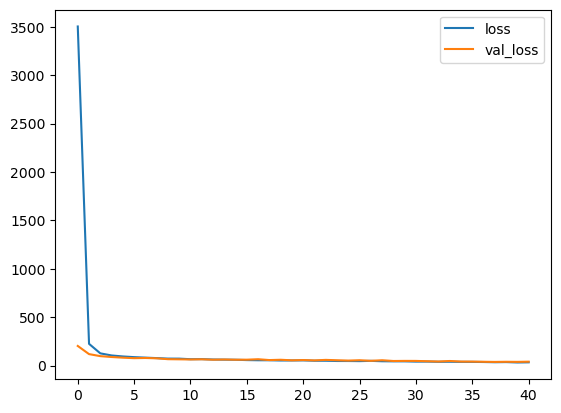

In [47]:
# 메모리 에러남
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 시각화
import matplotlib.pyplot as plt
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### [2-4] 평가
---
 - evaluate() 메서드
   - 파라미터: test_data, test_target
   - 반환값: loss, compile()의 matrics에서 설정한 항목값

In [48]:
eRet=model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 40.4998 - mse: 40.4998


In [49]:
eRet

[40.49979782104492, 40.49979782104492]

### [2-5] 예측
---
 - predict()

In [52]:
# x_train[0] -> 1차원 배열
# x_train[:1] -> 2차원 배열
model.predict(x_train[:1])

1/1 [==============================] - 0s 79ms/step


array([[17.764214]], dtype=float32)